<a href="https://colab.research.google.com/github/gnjohnson29/MPM_200_Johnson/blob/main/notebook/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 19th November 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [7]:
install.packages("beepr") #to install the beepr package from CRAN

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘audio’




In [8]:
library(beepr) #to load the package so its functions are available

In [9]:
beep("mario") #attempt to play the mario sound, but it does not play audible sound due to Colab audio limits

Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


In [10]:
#installing the remaining required packages:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("sjPlot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [11]:
#read the csv file
data  = read.csv("/content/Hummingbird_data.csv") #Uploaded Hummingbird_data.csv to my GitHub repo and copied the raw file link

In [12]:
head(data) #to check first few rows and confirm the file loaded correctly

,Admitted,Disposition_binary,Place,F_Aid,Species_e,Sex_e,Age_e,Brought_in_after,season,r,Green_Orange,ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,1/2/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,1,Winter,found on the ground,Non-selasphorus spp.,1_ANHU
2,1/2/1991,Released,Lindsey,Yes,ANHU,Female-like,adult-like,0,Winter,unknown,Non-selasphorus spp.,2_ANHU
3,1/4/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,suspect torpor-like state,Non-selasphorus spp.,3_ANHU
4,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,4,Winter,unknown,Non-selasphorus spp.,4_ANHU
5,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,caught by domestic animal,Non-selasphorus spp.,5_ANHU
6,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,found on the ground,Non-selasphorus spp.,6_ANHU


In [13]:
colnames(data) #to display all column names in the dataset

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

In [14]:
nrow(data) #prints the total number of rows

[1] 6908

In [15]:
ncol(data) #prints the total number of columns

[1] 12

In [16]:
dim(data) #to see both rows and columns together

[1] 6908   12

In [17]:
## There are 6908 rows and 12 columns in the dataframe

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [18]:
str(data) #to view the structure of the dataframe


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [19]:
# Identify data types of each column
data_types = sapply(data, class) #to get the data type of each column
print(data) #to print the data types

       Admitted Disposition_binary         Place F_Aid       Species_e
1      1/2/1991               Died       Lindsey    No            ANHU
2      1/2/1991           Released       Lindsey   Yes            ANHU
3      1/4/1991               Died       Lindsey    No            ANHU
4      1/5/1991               Died       Lindsey    No            ANHU
5      1/5/1991               Died       Lindsey    No            ANHU
6      1/5/1991               Died       Lindsey    No            ANHU
7      1/6/1991               Died       Lindsey    No            ANHU
8      1/7/1991               Died       Lindsey    No            ANHU
9      1/8/1991               Died       Lindsey    No            ANHU
10    1/11/1991               Died       Lindsey    No            ANHU
11    1/13/1991               Died       Lindsey    No            ANHU
12    1/14/1991               Died       Lindsey    No            ANHU
13    1/21/1991               Died       Lindsey    No            ANHU
14    

Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [20]:
library(dplyr) #to load dplyr for sample_n and data manipulation
model_data = sample_n(data, 5000) #to randomly select 5000 rows from 'data' to create 'model_data'

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

In [21]:
dim(model_data) #to print the number of rows and columns in 'model_data'

[1] 5000   12

In [22]:
## There are 5000 rows and 12 columns present in the data frame currently

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

In [23]:
data_types_model = sapply(model_data, class) # to get data type of each column
table(data_types_model) #to count how many columns are character/factor (categorical) vs numeric (continuous)

data_types_model
character   integer 
       11         1 

In [24]:
## Out of the 12 columns in model_data, there are 11 columns that are categorical variables and 1 column that is a numerical variable

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [25]:
library(ggplot2)

In [26]:
write.csv(model_data, "Hummingbird_data_GabriellaJohnson.csv, row.names - FALSE") #to save the model_data CSV for submission

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [27]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4143
Santa Barbara,64
malibu,793


In [28]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [29]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

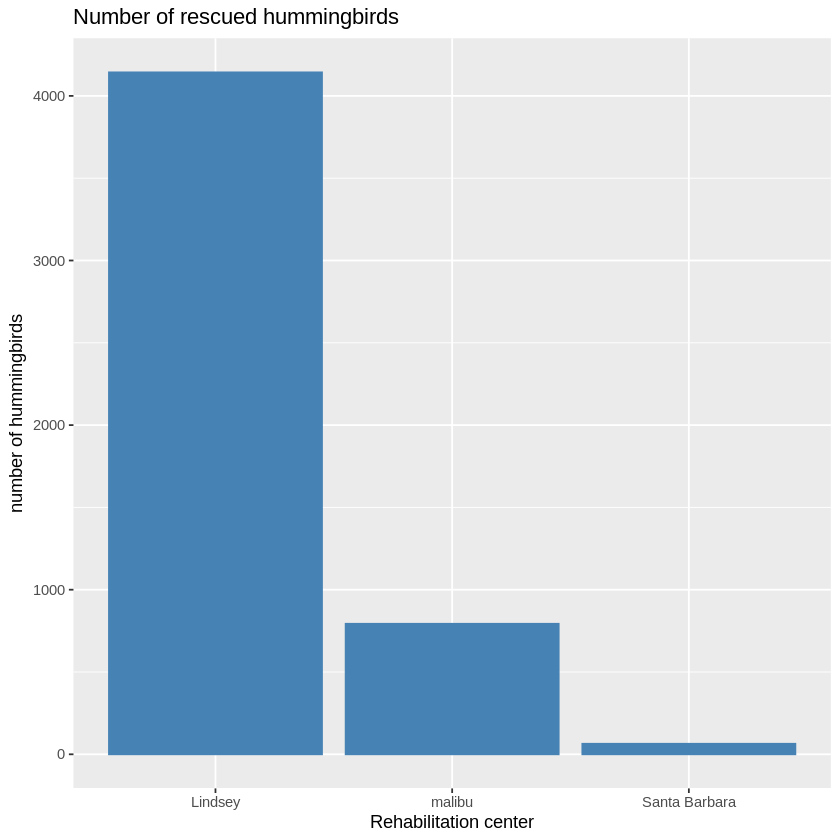

In [30]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [31]:
pdf("Hummingbird_plot.pdf", width = 4, height = 3) #opens a PDF that is 4 inches wide and 3 inches tall
print(p) #to print the plot to the PDF
dev.off() #to close the PDF to save the file

agg_record_884969765 
                   2

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

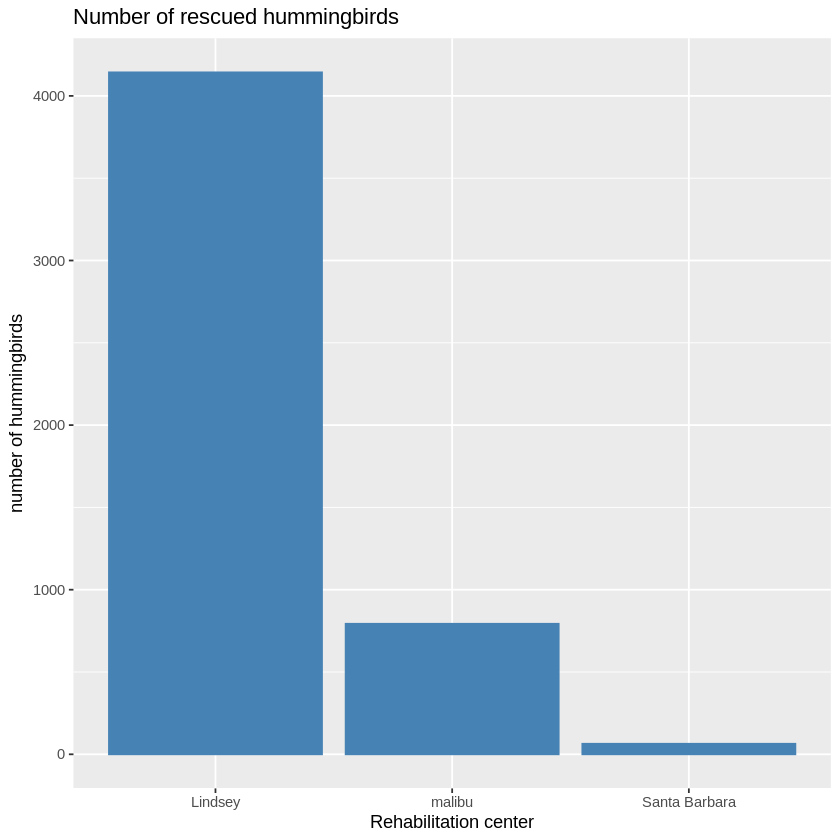

In [32]:
rehab = model_data  %>% #start with the 'model_data' dataframe
group_by(Place)%>% #groups data by rehabilitation center
summarise(count = n_distinct(ID)) #counts the unique hummingbird IDs in each rehabilitation center
## Groups the dataset by rehabilitation center and counts the number of unique hummingbirds per rehabilitation center.

p = ggplot(rehab, aes(x = Place, y = count)) + #sets up the ggplot with Place on the x-axis and count on the y-axis
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+ #makes bars with color and fill
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+ #labels the x-axis and y-axis
labs(title = "Number of rescued hummingbirds") #adds a plot title
## Creates a ggplot using the rehab data, which includes putting Place on the x-axis and count on the y-axis. Also draws the bars where height equals the count, sets the color/appearance of the bars, and labels both the axes and adds a title to the plot.

p #displays the plot
## Prints the plot so it can be displayed.




# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

In [33]:
## 1. In looking at head(data) from Q1, I think the 5 covariates that affect survival are Species_e, Sex_e, Age_e, season, and r.

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

In [34]:
df = model_data  %>%
group_by(Species_e, Sex_e, Age_e, season, r)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Species_e', 'Sex_e', 'Age_e', 'season'.
You can override using the `.groups` argument.


In [35]:
df

Species_e,Sex_e,Age_e,season,r,count
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
ANHU,Female-like,adult-like,Fall,caught by domestic animal,82
ANHU,Female-like,adult-like,Fall,found inside,18
ANHU,Female-like,adult-like,Fall,found on the ground,123
ANHU,Female-like,adult-like,Fall,nest-related,3
ANHU,Female-like,adult-like,Fall,suspect torpor-like state,11
ANHU,Female-like,adult-like,Fall,unknown,29
ANHU,Female-like,adult-like,Fall,window hit,53
ANHU,Female-like,adult-like,Spring,caught by domestic animal,159
ANHU,Female-like,adult-like,Spring,found inside,43


In [36]:
table_Species_e = model_data%>%
group_by(Species_e,Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_Sex_e = model_data %>%
group_by(Sex_e, Disposition_binary) %>%
summarise(count = n_distinct(ID))

table_Age_e = model_data %>%
group_by(Age_e, Disposition_binary) %>%
summarise(count = n_distinct(ID))

table_season = model_data %>%
group_by(season, Disposition_binary) %>%
summarise(count = n_distinct(ID))

table_r = model_data %>%
group_by(r, Disposition_binary) %>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Species_e'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Sex_e'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'r'. You can override using the `.groups`
argument.


In [37]:
table_Species_e
table_Sex_e
table_Age_e
table_season
table_r

Species_e,Disposition_binary,count
<chr>,<chr>,<int>
ANHU,Died,2306
ANHU,Released,828
BCHU,Died,19
BCHU,Released,15
Non-selasphorus,Died,334
Non-selasphorus,Released,626
Selasphorus,Died,561
Selasphorus,Released,311


Sex_e,Disposition_binary,count
<chr>,<chr>,<int>
Female-like,Died,2334
Female-like,Released,909
Male,Died,465
Male,Released,110
unknown,Died,421
unknown,Released,761


Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,417
Nestling,Released,761
adult-like,Died,2803
adult-like,Released,1019


season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,401
Fall,Released,59
Spring,Died,1347
Spring,Released,933
Summer,Died,918
Summer,Released,606
Winter,Died,554
Winter,Released,182


r,Disposition_binary,count
<chr>,<chr>,<int>
caught by domestic animal,Died,466
caught by domestic animal,Released,173
found inside,Died,118
found inside,Released,44
found on the ground,Died,1411
found on the ground,Released,732
nest-related,Died,268
nest-related,Released,416
suspect torpor-like state,Died,93


In [38]:
p_Species_e = ggplot(table_Species_e, aes(x = Species_e, y = count, fill = Disposition_binary)) +
              geom_bar(stat = "identity", color = 'steelblue', fill = 'steelblue', position = "dodge") +
              xlab("Species_e") + ylab("Number of hummingbirds") +
              labs(title = "Number of hummingbirds by Species_e and Disposition")

p_Sex_e = ggplot(table_Sex_e, aes(x = Sex_e, y = count, fill = Disposition_binary)) +
          geom_bar(stat = "identity", color = 'steelblue', fill = 'steelblue', position = "dodge") +
          xlab("Sex_e") + ylab("Number of hummingbirds") +
          labs(title = "Number of hummingbirds by Sex_e and Disposition")

p_Age_e = ggplot(table_Age_e, aes(x = Age_e, y = count, fill = Disposition_binary)) +
          geom_bar(stat = "identity", color = 'steelblue', fill = 'steelblue', position = "dodge") +
          xlab("Age_e") + ylab("Number of hummingbirds") +
          labs(title = "Number of hummingbirds by Age_e and Disposition")

p_season = ggplot(table_season, aes(x = season, y = count, fill = Disposition_binary)) +
            geom_bar(stat = "identity", color = 'steelblue', fill = 'steelblue', position = "dodge") +
            xlab("season") + ylab("Number of hummingbirds") +
            labs(title = "Number of hummingbirds by Season and Disposition")

p_r = ggplot(table_r, aes(x = r, y = count, fill = Disposition_binary)) +
      geom_bar(stat = "identity", color = 'steelblue', fill = 'steelblue', position = "dodge") +
      xlab("r") + ylab("Number of hummingbirds") +
      labs(title = "Number of hummingbirds by R and Disposition")


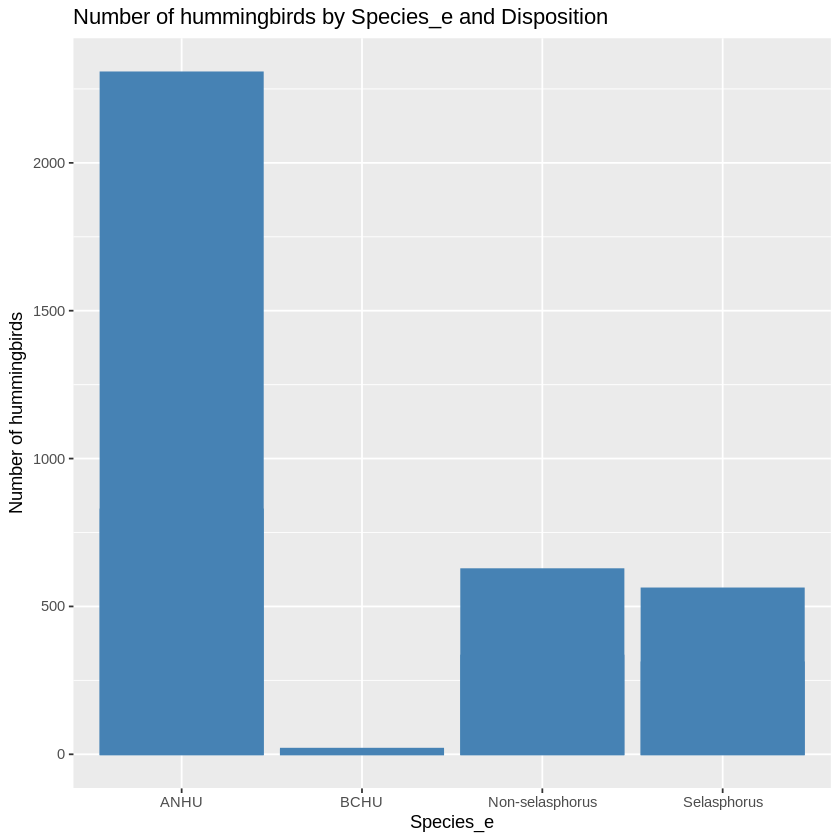

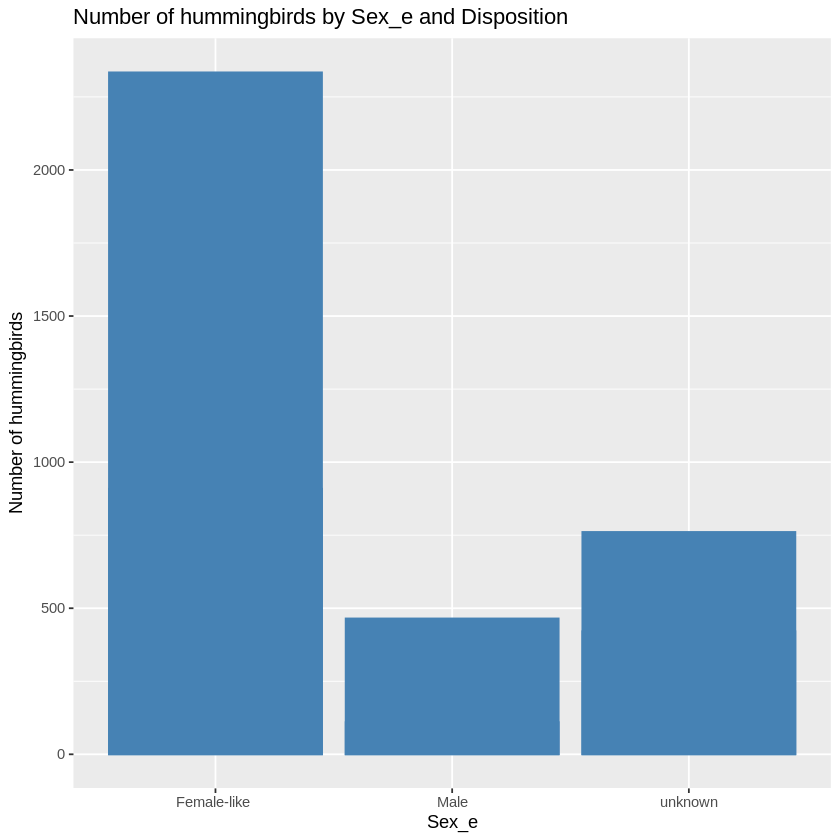

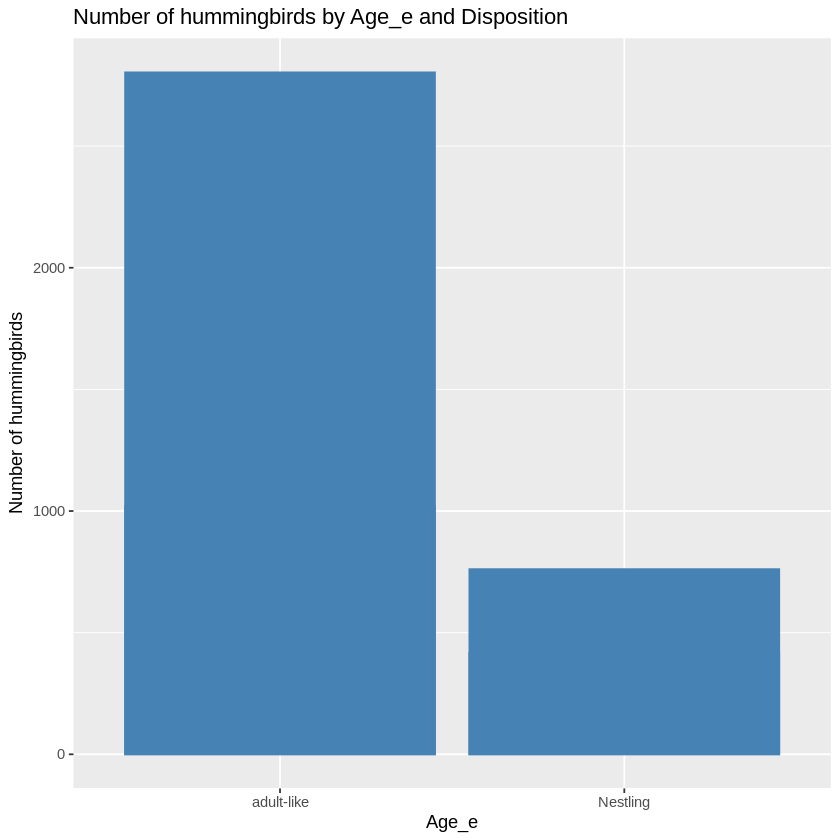

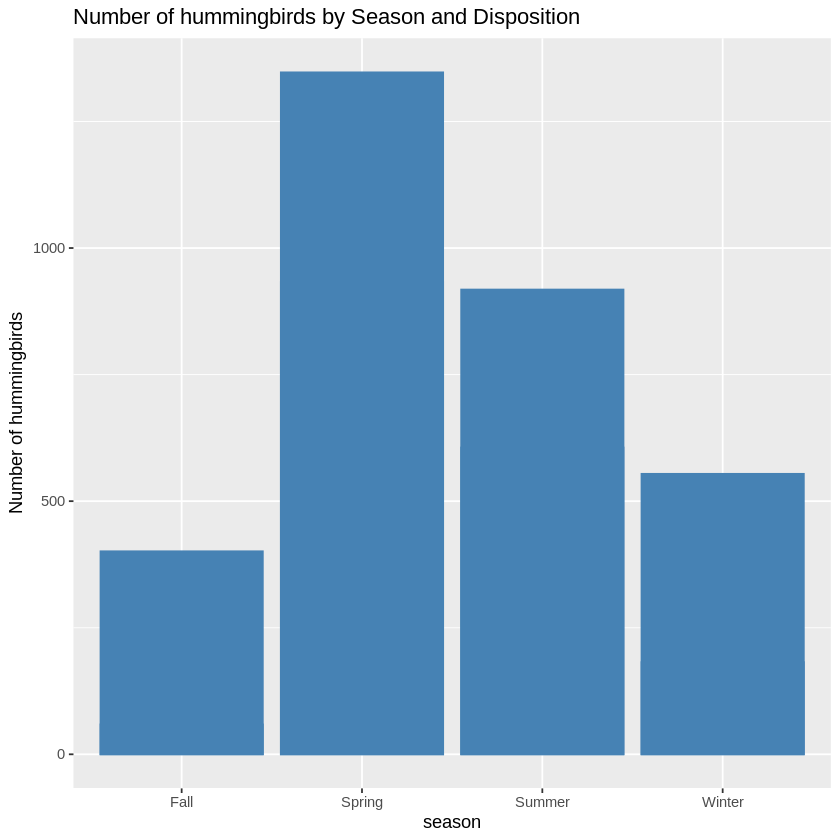

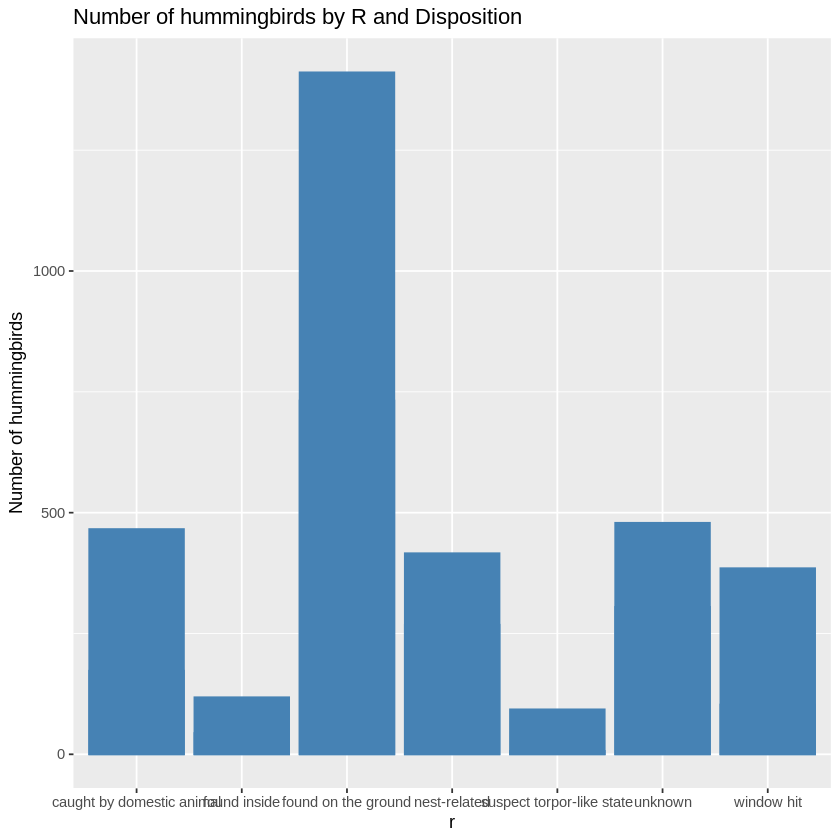

In [39]:
p_Species_e
p_Sex_e
p_Age_e
p_season
p_r

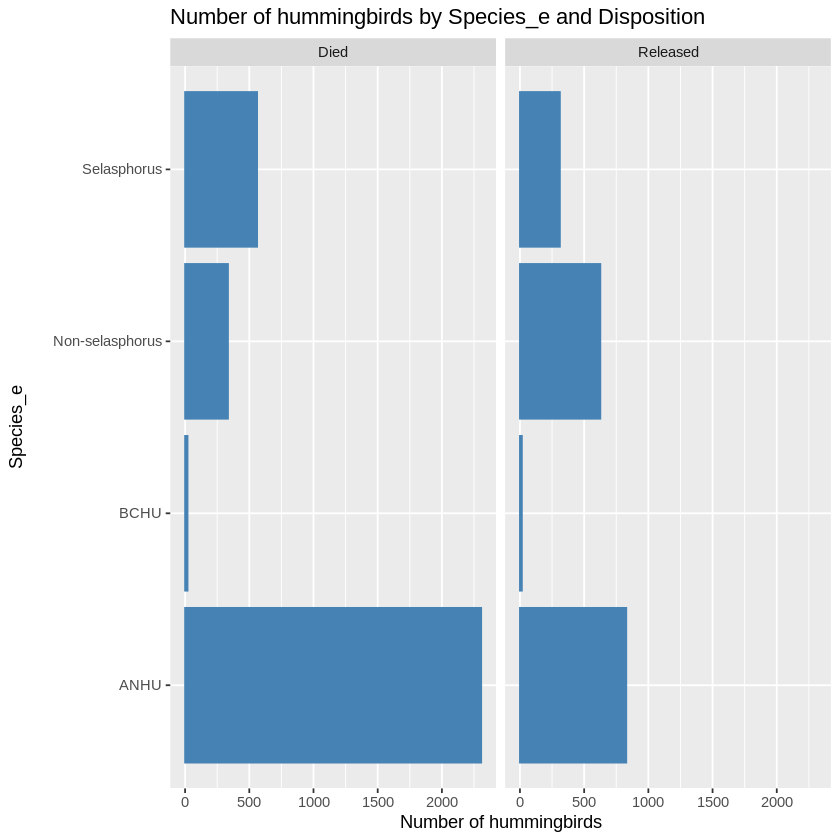

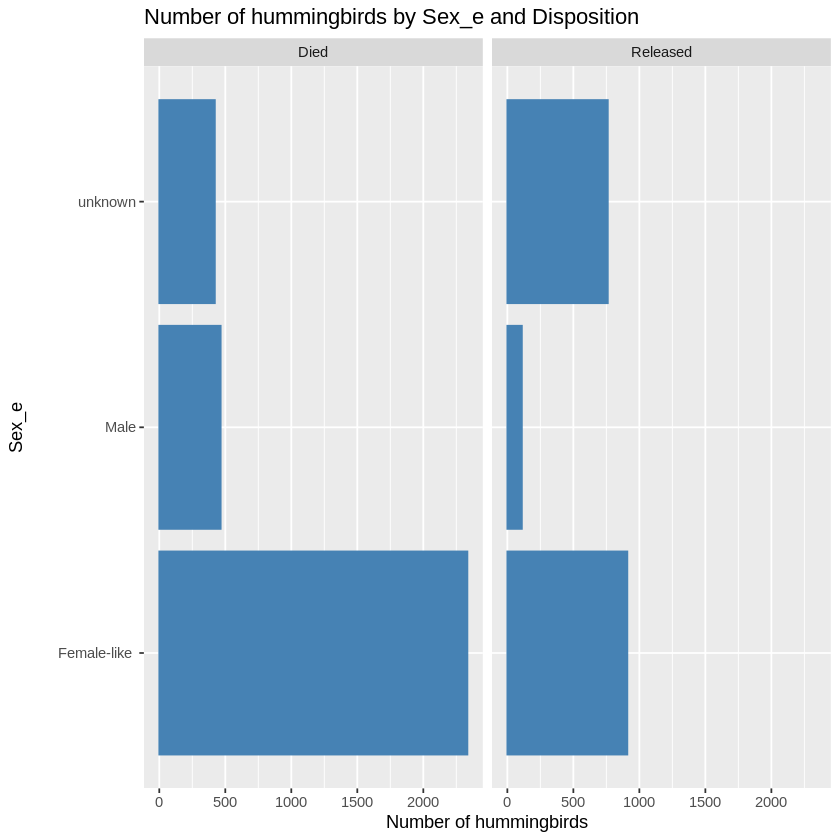

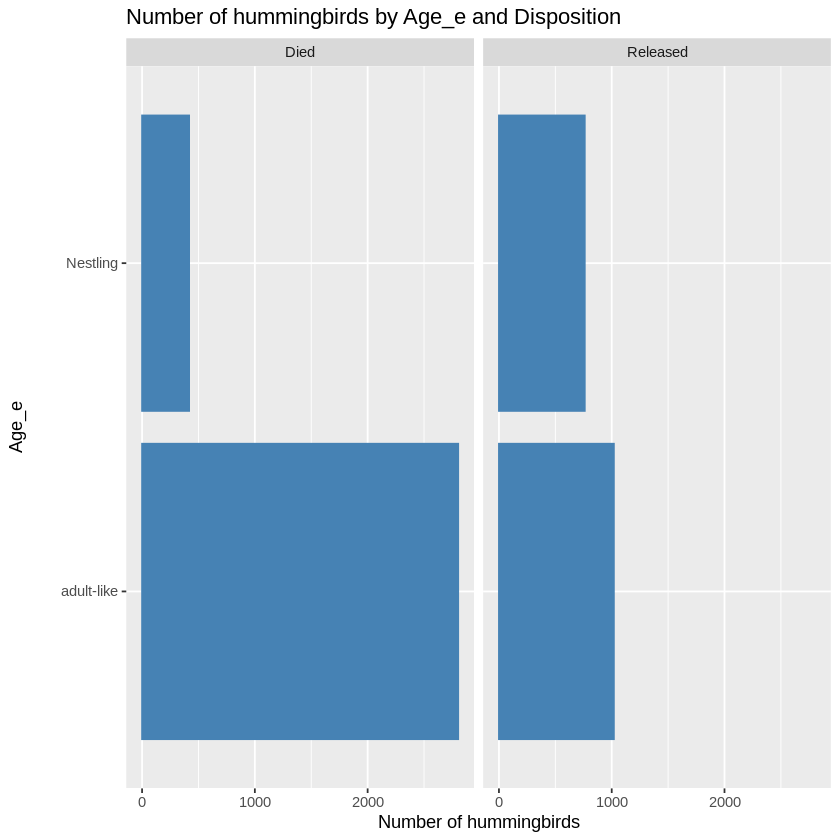

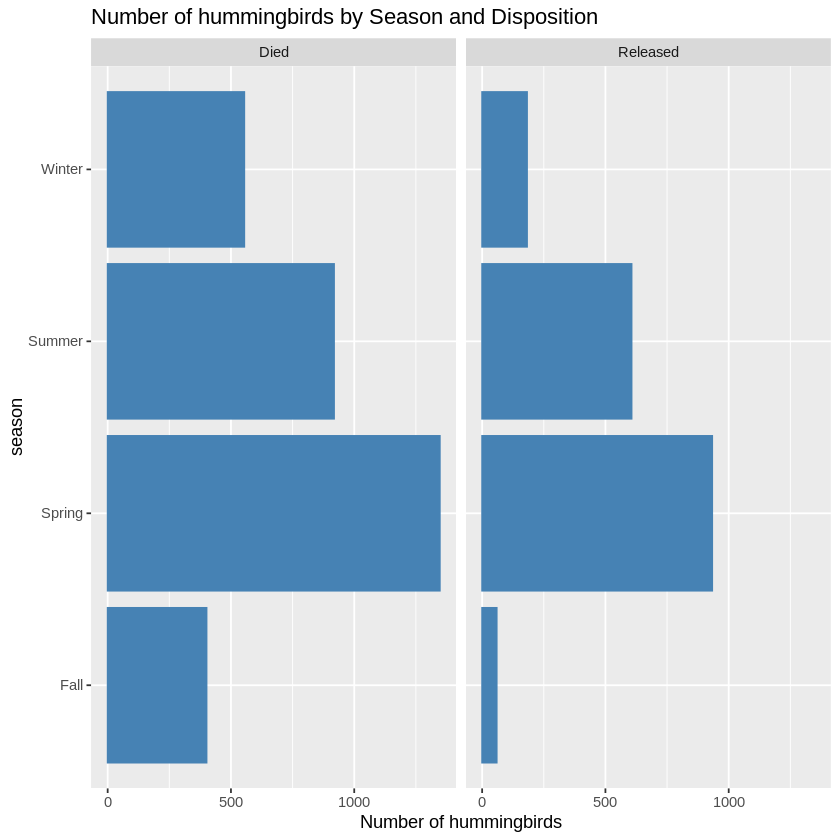

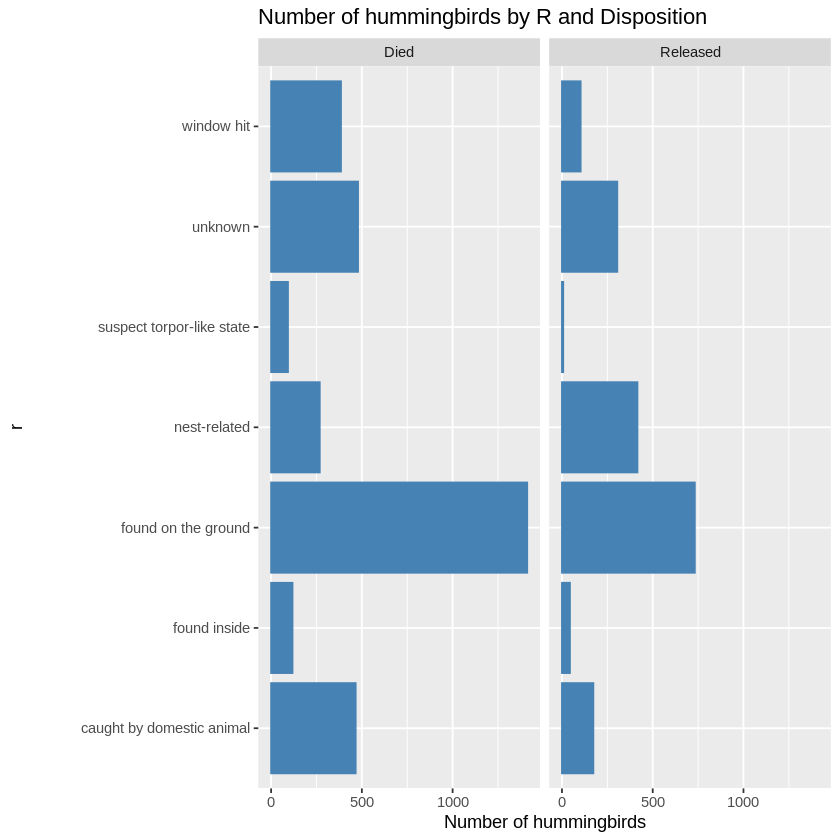

In [40]:
p_Species_e + facet_grid(. ~ Disposition_binary)+ coord_flip()

p_Sex_e + facet_grid(. ~ Disposition_binary)+ coord_flip()

p_Age_e + facet_grid(. ~ Disposition_binary)+ coord_flip()

p_season + facet_grid(. ~ Disposition_binary)+ coord_flip()

p_r + facet_grid(. ~ Disposition_binary)+ coord_flip()

In [41]:
## Across the tables and plots, each variable has at least one category that shows up more often in birds that dies compared to those that were released.
# For species, the ANHU group stands out on the "died" side.
# For sex, the "female-like" category appears more often.
# For age, the "adult-like" birds show up more in the died group.
# For season, most deaths occurred in Spring.
# For r, birds found on the ground are much more common in the died group.

## Based on the plots, all of these variables look like they might be associated with final disposition since certain categories are more represent among birds that died.
# But the patterns are still pretty descriptive/visual, so we cannot be sure they are actually associated without statistical testing.

## A logistic regression would be the best way to test whether these variables are statistically associated with final disposition since the outcome is categoricsl.

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


Place,Disposition_binary,count,proportion
<chr>,<chr>,<int>,<dbl>
Lindsey,Died,2680,0.6468742
Lindsey,Released,1463,0.3531258
Santa Barbara,Died,38,0.5937500
Santa Barbara,Released,26,0.4062500
malibu,Died,502,0.6330391
malibu,Released,291,0.3669609


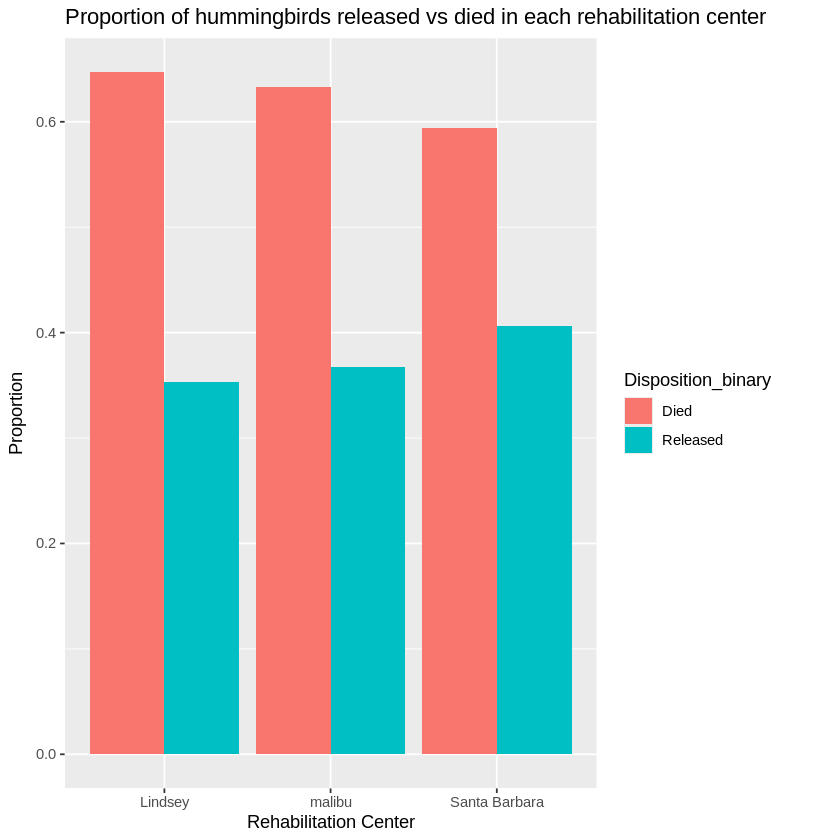

In [60]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

proportions

# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("Proportion") +
  labs(title = "Proportion of hummingbirds released vs died in each rehabilitation center")

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

Species_group,Disposition_binary,count,proportion
<chr>,<chr>,<int>,<dbl>
Non-selasphorus,Died,2659,0.6441376
Non-selasphorus,Released,1469,0.3558624
Selasphorus,Died,561,0.6433486
Selasphorus,Released,311,0.3566514


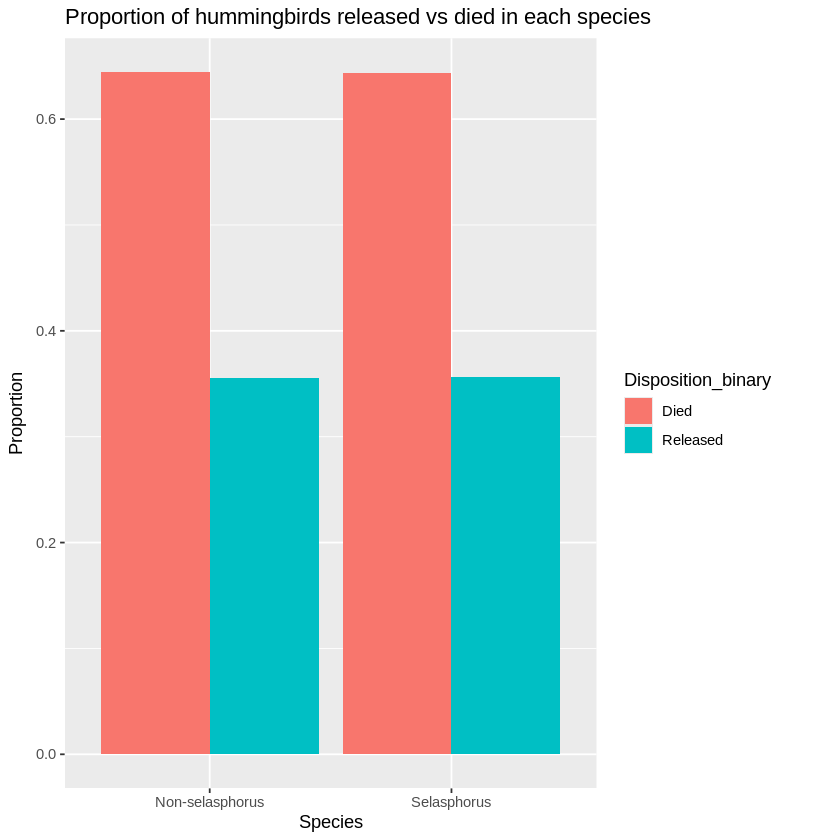

In [61]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(grepl("Selasphorus", model_data$Species_e), "Selasphorus", "Non-selasphorus")

# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop") %>%
  group_by(Species_group) %>%
  mutate(proportion = count / sum(count))

species_distribution

ggplot(species_distribution, aes(x = Species_group, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species") +
  ylab("Proportion") +
  labs(title = "Proportion of hummingbirds released vs died in each species")

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [62]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

Q12a Please explain the argument `format` in code above

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [63]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

In [64]:
admissions_by_month

Admitted_month,count
<chr>,<int>
01,235
02,368
03,717
04,885
05,678
06,838
07,463
08,223
09,156


In [65]:
admissions_by_year

Admitted_year,count
<chr>,<int>
1991,134
1992,124
1993,140
1994,131
1995,150
1996,159
1997,130
1998,144
1999,149


Finally, we can use `ggplot` to plot these timelines.

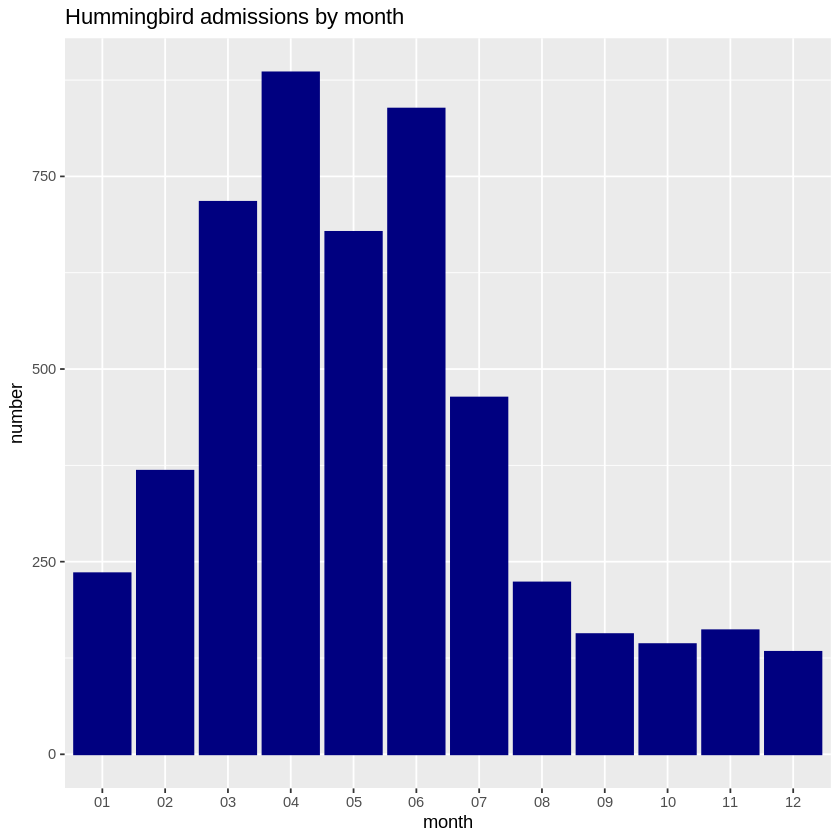

In [66]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity", color = 'navy', fill = 'navy') +
  xlab("month") +
  ylab("number") +
  labs(title = "Hummingbird admissions by month")

p_month

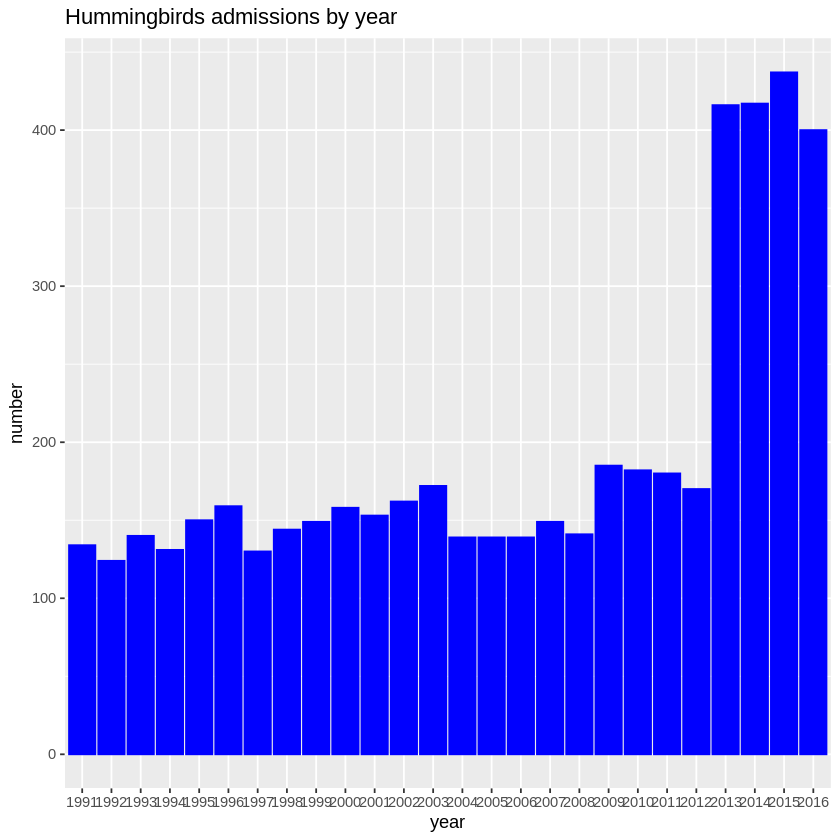

In [67]:
## Plot similar timeline for Yearly admissions of Hummingbirds

p_year = ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity", color = 'blue', fill = 'blue') +
  xlab("year") +
  ylab("number") +
  labs(title = "Hummingbirds admissions by year")

p_year

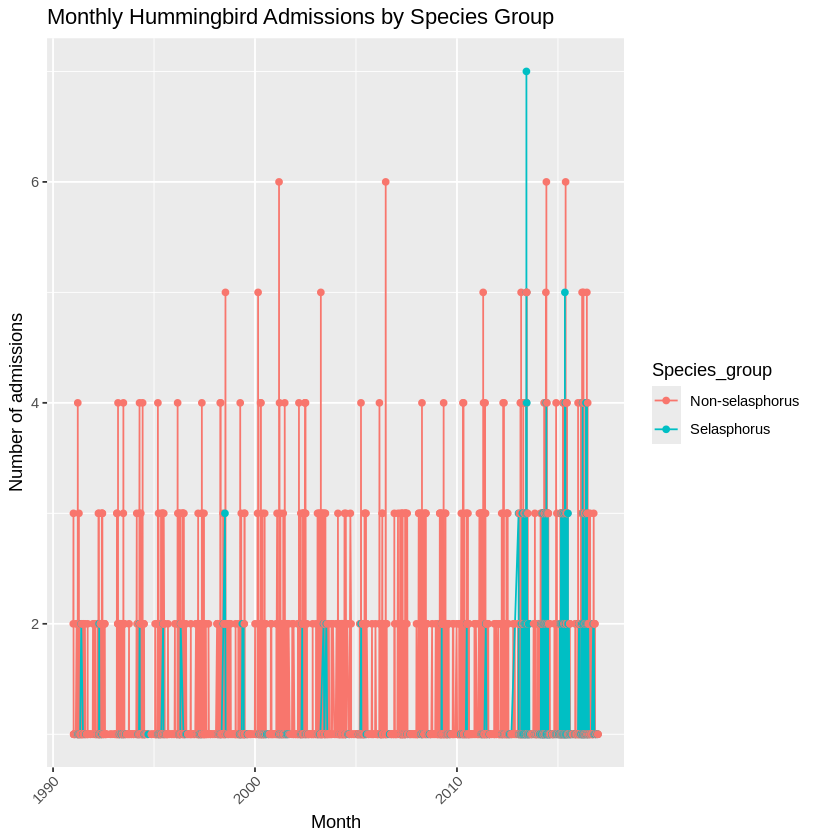

In [75]:
admissions_month_species = model_data %>%
  mutate(Admitted_date = as.Date(Admitted, format = "%m/%d/%Y"),
        Month = as.Date(Admitted_date, "month"))

admissions_month_species = admissions_month_species %>%
    group_by(Month, Species_group) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(admissions_month_species, aes(x = Month, y = count, color = Species_group, group = Species_group)) +
  geom_line() +
  geom_point() +
  xlab("Month") +
  ylab("Number of admissions") +
  labs(title = "Monthly Hummingbird Admissions by Species Group") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))